In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerRegularPolyCollection # for legend change color
# from matplotlib import rcParams, matplotlib_fname
# # set the font to support Chinese characters
# rcParams['font.sans-serif'] = ['SimHei']
# # set the font size
# rcParams['font.size'] = 12
# # avoid using unicode minus sign
# rcParams['axes.unicode_minus'] = False

import seaborn as sns
import os
import sys

# 获取当前文件所在的文件夹路径
if "__file__" in globals():
    # 获取__file__变量的值
    file_path = __file__
    # 获取当前文件所在的文件夹路径
    dir_now = os.path.dirname(file_path)
else:
    # 获取当前工作目录
    dir_now = os.getcwd()
sys.path.append(os.path.join(dir_now, '../../'))
sys.path.append(os.path.join(dir_now, '../'))

from NNutils import *
from amm_methods import *
import pickle

marker_list = ["s", "o", "v", "*", "1", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d",]
colors_list = ['#F27970', '#BB9727', '#54B345', '#32B897', '#05B9E2',
              '#8983BF', '#C76DA2', '#FFBE7A', '#82B0D2', '#BEB8DC',
              '#E7DAD2', '#999999']
cmap_list = ['Blues', 'Reds', 'Greens', 'Purples', 'Greys', 'Oranges']
cmap_max_list = [(0.05636293733179547, 0.34963475586312953, 0.6367550941945406, 1.0), 
                 (0.4725720876585929, 0.016608996539792385, 0.059838523644752006, 1.0), 
                 (0.034986543637062675, 0.45743944636678197, 0.19753940792003075, 1.0), 
                 (0.2703114186851211, 0.043183391003460206, 0.5101268742791234, 1.0), 
                    (0.4, 0.4, 0.4, 1.0),
                 (0.5412226066897348, 0.16955017301038064, 0.014579008073817762, 1.0)]


/shared/conda/envs/bolt/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def is_even(num):
    return True if num % 2 == 0 else False
def is_odd(num):
    return True if num % 2 == 1 else False

## 分割阈值

In [23]:
linear_name = 'etl1'
feedback_bits = 256
linear_name_full = "ex_linear1"
method = METHOD_MITHRAL
ncodebooks = 64 # max:64
ncentroids = [128, 256, 512, 1024, 2048]
D = 64
train_sam_num = 1000 # 训练集样本数
test_sam_num = 1000
i_cb = 0 # 选择第几个codebook
i_ncentroids = -1 # 选择第几个ncentroids


In [21]:
AMM_train_dirs = get_AMM_train_dirs(linear_name, linear_name_full, method, feedback_bits, train_sam_num, test_sam_num)
train_data = np.load(os.path.join(AMM_train_dirs["dir_train"],AMM_train_dirs["linearin_path_train"]))

In [14]:
# 读取split
pkl_path = os.path.join(dir_now, 'CsiTransformerAMM/intermediate_var/pkl/%s/CKD(%i, %i, %i)_split.pkl' 
                        % (linear_name, ncodebooks, ncentroids[i_ncentroids], D))
fr = open(pkl_path, 'rb')
splits = pickle.load(fr)
fr.close()
print(len(splits)) # 码本数
print(len(splits[0])) # 质心数以二为底的对数

64
11


In [13]:
# 读取bucket
pkl_path = os.path.join(dir_now, 'CsiTransformerAMM/intermediate_var/pkl/%s/CKD(%i, %i, %i)_bucket.pkl'
                        % (linear_name, ncodebooks, ncentroids[i_ncentroids], D))
fr = open(pkl_path, 'rb')
buckets = pickle.load(fr)
fr.close()
print(len(buckets)) # 码本数
print(len(buckets[0])) # 质心数

64
2048


In [7]:
# 查看第i_cb个码本splits的值
p=splits[i_cb]
for p_i in p:
    for v in p_i.vals:
        # 不带换行
        v_real = v/p_i.scaleby+ p_i.offset
        print(v_real, end=' ')
    #换行
    print()

-0.014990349300205708 
-0.11582066118717194 0.11464808881282806 
-0.19504396617412567 -0.06223146617412567 0.04714353382587433 0.21511228382587433 
-0.26414626836776733 -0.15086501836776733 -0.08836501836776733 -0.037583768367767334 0.017103731632232666 0.07569748163223267 0.16163498163223267 0.29835373163223267 
-0.3202134221792221 -0.2264634221792221 -0.1717759221792221 -0.1327134221792221 -0.1014634221792221 -0.0741196721792221 -0.05068217217922211 -0.027244672179222107 0.004005327820777893 0.03525532782077789 0.0625990778207779 0.0938490778207779 0.1368178278207779 0.1875990778207779 0.2540053278207779 0.3672865778207779 
-0.37317535281181335 -0.29114410281181335 -0.24426910281181335 -0.20911285281181335 -0.18567535281181335 -0.16223785281181335 -0.14270660281181335 -0.12317535281181335 -0.10755035281181335 -0.09583160281181335 -0.08020660281181335 -0.06848785281181335 -0.056769102811813354 -0.045050352811813354 -0.033331602811813354 -0.021612852811813354 -0.0059878528118133545 0.0

In [26]:
buckets_cb = buckets[i_cb] # 第i_cb个码本的buckets
# for i, bucket in enumerate(buckets_cb):
#     # if len(bucket.point_ids) < 1: # 查看空的bucket
#     #     print("bucket %i" % i)
#     #     print(len(bucket.point_ids))
#     # 打印K个bucket中的存在的点的具体值
#     if len(bucket.point_ids) > 0:
#         print("bucket %i" % i)
#         print(len(bucket.point_ids))
# 保存K个bucket中的存在的点的具体值，至txt文件
with open("bucket_point_(%i, %i, %i)_cb%i.txt" % (ncodebooks, ncentroids[i_ncentroids], D, i_cb), "w") as f:
    for i, bucket in enumerate(buckets_cb):
        if len(bucket.point_ids) > 0:
            f.write("bucket %i" % i)
            f.write("\n")
            f.write(str(len(bucket.point_ids)))
            f.write("\n")
            for point_id in bucket.point_ids:
                f.write(str(train_data[point_id, 0]))
                f.write(" ")
            f.write("\n")

        

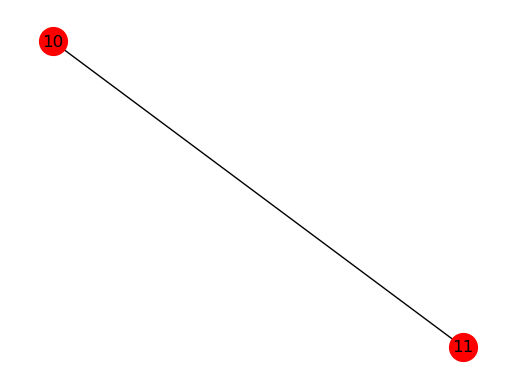

In [32]:
# demo1: 简单测试示例
 
# 导入指定类和函数
from pybst.bstree import BSTree
from pybst.draw import plot_tree
 
# 创建一个树
tree=BSTree()
 
tree.insert(10, '')
"""
insert()方法说明: 增加一个节点(key为10, value为a), key 必须是数值, value 看起来没什么用, 直接赋空字符串即可.
因为没有指定 parent 参数, 而且是第一个没有指定 parent 的调用, 所以新节点为根节点.
在根节点生成后, 如调用 insert() 时仍没有指定 parent 的话, bst 包将按照二叉查找树的规则, 自动在合适的节点上增加子节点.
但注意该函数返回值为空, 而不是新生成的节点, 要获得新节点, 需要使用get_node()方法.
"""
 
# 获取key=10的节点
parent_node=tree.get_node(10)
 
# 在key=10的节点上增加子节点, 因为bst包是二叉查找树, 所以如果三次指定了同一个parent_node, 
# 第3次新增的节点将是parent_node的孙子节点, 而不是直接子节点
tree.insert(11, '', parent_node)
 
# 二叉查找树可视化, 该树共两个节点: 10 和 11
plot_tree(tree)

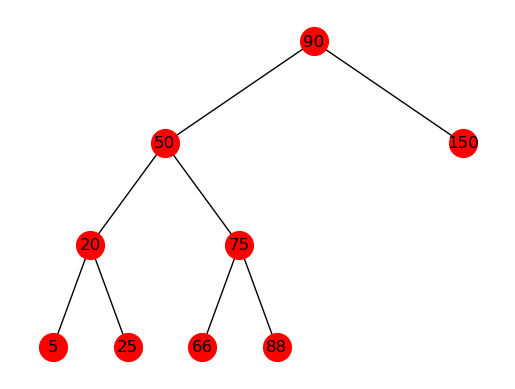

In [33]:
# demo2: 一个稍微复杂的示例
 
# 创建一个树
tree=BSTree()
tree.insert(90, (0,0))
 
node_90=tree.get_node_by_value((0,0))
tree.insert(50, (1,0), node_90)
tree.insert(150, (1,1), node_90)
 
node_50=tree.get_node_by_value((1,0))
tree.insert(20, (2,0), node_50)
tree.insert(75, (2,1), node_50)
 
node_20=tree.get_node_by_value((2,0))
tree.insert(5, (3,0), node_20)
tree.insert(25, (3,1), node_20)
 
node_75=tree.get_node_by_value((2,1))
tree.insert(66, (3,2), node_75)
tree.insert(88, (3,3), node_75)
# tree.insert(98, '', node_75) # 注意98这个节点将自动会接在88节点下, 而不是75节点下.
 
# 二叉查找树可视化
plot_tree(tree)

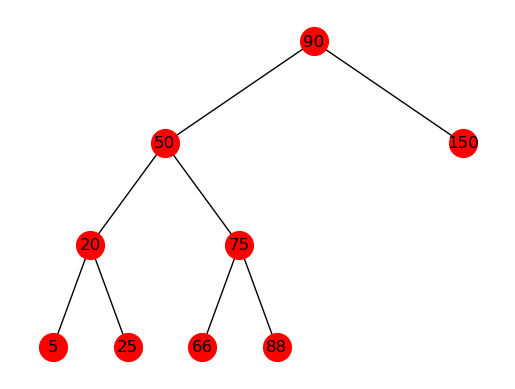

In [34]:
# demo2: 一个稍微复杂的示例
 
# 创建一个树
tree=BSTree()
tree.insert(90, (0,0))
 
node_90=tree.get_node_by_value((0,0))
tree.insert(50, (1,0), node_90)
tree.insert(150, (1,1), node_90)
 
node_50=tree.get_node_by_value((1,0))
tree.insert(20, (2,0), node_50)
tree.insert(75, (2,1), node_50)
 
node_20=tree.get_node_by_value((2,0))
tree.insert(5, (3,0), node_20)
tree.insert(25, (3,1), node_20)
 
node_75=tree.get_node_by_value((2,1))
tree.insert(66, (3,2), node_75)
tree.insert(88, (3,3), node_75)
# tree.insert(98, '', node_75) # 注意98这个节点将自动会接在88节点下, 而不是75节点下.
 
# 二叉查找树可视化
plot_tree(tree)


In [35]:
print(p[0].vals[0])
print(p[1].vals)
print(p[2].vals)
print(p[3].vals)
print(p[4].vals)
print(p[5].vals)
print(p[6].vals)
print(p[7].vals*256/ p[7].scaleby)

64
[ 51 110]
[ 41  75 103 146]
[ 32  61  77  90 104 119 141 176]
[ 25  49  63  73  81  88  94 100 108 116 123 131 142 155 172 201]
[ 18  39  51  60  66  72  77  82  86  89  93  96  99 102 105 108 112 116
 120 124 128 131 136 141 146 151 158 165 174 184 198 221]
[ 13  31  41  48  54  59  63  67  70  73  76  79  81  84  86  88  90  92
  94  96  97  99 101 102 104 106 107 109 110 112 113 114 116 119 121 123
 125 127 129 130 132 134 136 138 140 142 145 147 150 153 155 159 162 165
 169 173 177 182 187 193 200 208 219 238]
[  8.  22.  32.  38.  42.  46.  50.  54.  56.  58.  62.  64.  66.  68.
  70.  72.  74.  74.  76.  78.  78.  80.  82.  84.  84.  86.  86.  88.
  88.  90.  92.  92.  94.  94.  96.  96.  98.  98.  98. 100. 100. 102.
 102. 104. 104. 104. 106. 106. 108. 108. 108. 110. 110. 112. 112. 112.
 114. 114. 114. 116. 116. 116. 118. 118. 120. 120. 122. 122. 124. 124.
 126. 126. 128. 128. 130. 130. 132. 132. 134. 134. 136. 136. 138. 138.
 138. 140. 140. 142. 142. 144. 146. 146. 148. 148. 

In [42]:
print(p[0].scaleby)
print(p[1].scaleby)
print(p[2].scaleby)
print(p[3].scaleby)
print(p[4].scaleby)
print(p[5].scaleby)
print(p[6].scaleby)
print(p[7].scaleby)
print(p[8].scaleby)
print(p[9].scaleby)
print(p[10].scaleby)

256.0
256.0
256.0
256.0
256.0
256.0
256.0
128.0
128.0
128.0
128.0


In [37]:
base_i = 6 # 2^base_i个split
print(f"当前显示分割阈值二叉树的第{base_i}层和它的子节点")
p_base = p[base_i].vals/ p[base_i].scaleby + p[base_i].offset
p_child = p[base_i+1].vals/ p[base_i+1].scaleby + p[base_i+1].offset
for i, p_base_item in enumerate(p_base):
    p_child_i = [2*i, 2*i+1]# p_base的每个split对应的孩子的index
    print("父节点：%.6f, 子节点%.6f,%.6f" % (p_base[i], p_child[p_child_i[0]], p_child[p_child_i[1]]))

当前显示分割阈值二叉树的第6层和它的子节点
父节点：-0.414325, 子节点-0.449360,-0.394673
父节点：-0.344012, 子节点-0.355610,-0.332173
父节点：-0.304950, 子节点-0.316548,-0.300923
父节点：-0.277606, 子节点-0.285298,-0.269673
父节点：-0.254168, 子节点-0.261860,-0.254048
父节点：-0.234637, 子节点-0.238423,-0.230610
父节点：-0.219012, 子节点-0.222798,-0.214985
父节点：-0.203387, 子节点-0.207173,-0.199360
父节点：-0.191668, 子节点-0.191548,-0.191548
父节点：-0.179950, 子节点-0.183735,-0.175923
父节点：-0.168231, 子节点-0.175923,-0.168110
父节点：-0.156512, 子节点-0.160298,-0.152485
父节点：-0.148700, 子节点-0.152485,-0.144673
父节点：-0.136981, 子节点-0.144673,-0.136860
父节点：-0.129168, 子节点-0.136860,-0.129048
父节点：-0.121356, 子节点-0.121235,-0.121235
父节点：-0.113543, 子节点-0.113423,-0.113423
父节点：-0.105731, 子节点-0.105610,-0.105610
父节点：-0.097918, 子节点-0.097798,-0.097798
父节点：-0.090106, 子节点-0.097798,-0.089985
父节点：-0.086200, 子节点-0.089985,-0.082173
父节点：-0.078387, 子节点-0.082173,-0.074360
父节点：-0.070575, 子节点-0.074360,-0.074360
父节点：-0.066668, 子节点-0.066548,-0.066548
父节点：-0.058856, 子节点-0.058735,-0.058735
父节点：-0.051043, 子节点-0.058735,

(2, 1)
(3, 2)
(2, 1)
(3, 3)
(2, 2)
(3, 4)
(2, 2)
(3, 5)
(4, 3)
(5, 6)
(5, 8)
(6, 16)
(5, 12)
(6, 24)
(5, 16)
(6, 33)


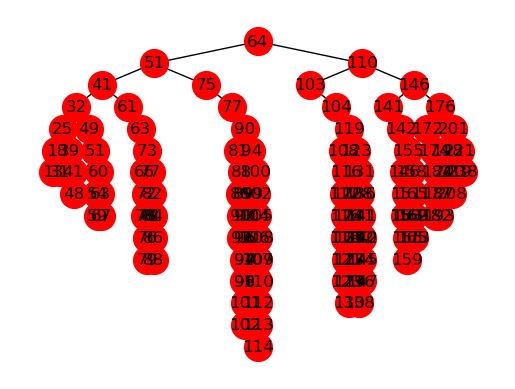

In [38]:
# 创建一个树
tree=BSTree()
tree.insert(p[0].vals[0], (0,0))

for i in range(1, len(p)-4):# 树的层索引
    for j in range(0, len(p[i].vals)): # 树当前层的节点索引
        node=tree.get_node_by_value((i-1,int(j/2) if is_even(j) else int((j-1)/2)))
        if p[i].vals[j] in [77,90,104,119]:
            print((i-1,int(j/2) if is_even(j) else int((j-1)/2)))
            print((i,j))
        tree.insert(p[i].vals[j], (i,j), node)

plot_tree(tree)

In [39]:
1//2

0